<a href="https://colab.research.google.com/github/Vadimcha/DANO2/blob/main/DANO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('./DB.xls') # База данных уже без выбросов
data = data.drop('beauty', axis=1)
data = data.drop('technology', axis=1)
services = data.columns[10:]
services

Index(['fuel', 'cinema', 'vkusvill', 'travel', 'restaurants', 'concerts',
       'games', 'books', 'theater', 'sports', 'flowers'],
      dtype='object')

In [ ]:
# Факторы объединения значений
factors = {
    'user_id': [],
    'num_sessions': ['mean'],
    'avg_session': ['mean'],
    'price': ['sum'],
    'fuel': ['sum'], 
    'cinema': ['sum'],
    'vkusvill': ['sum'], 
    'travel': ['sum'], 
    'restaurants': ['sum'], 
    'concerts': ['sum'], 
    'games': ['sum'], 
    'books': ['sum'],
    'theater': ['sum'], 
    'sports': ['sum'], 
    'flowers': ['sum'], \
}

dataUnique = data.groupby('user_id').agg(factors).round(2)
dataUnique = dataUnique.reset_index()

dataUnique.columns = ['user_id', 'summSessions', 'avg_session', 'summPrice', 'fuel', 'cinema', 'vkusvill',	
                     'travel',	'restaurants',	'concerts',	'games',	'books',	'theater',	'sports',	'flowers']
dataUnique.head(100)

,user_id,summSessions,avg_session,summPrice,fuel,cinema,vkusvill,travel,restaurants,concerts,games,books,theater,sports,flowers
0,9,1421.0,77.89,159.59,0,1,0,0,0,0,0,0,0,0,0
1,11,2422.0,66.22,703.86,3,0,0,0,0,0,0,0,0,0,0
2,25,770.0,57.98,79.56,0,0,0,0,0,0,0,1,0,0,0
3,31,763.0,95.56,361.43,0,3,0,0,0,0,0,0,0,0,0
4,42,485.0,71.45,703.98,3,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1001,845.0,76.01,2296.52,0,0,0,1,0,0,0,0,0,0,0
96,1002,1226.0,104.89,6738.28,30,1,0,0,0,0,0,0,0,0,0
97,1005,3002.0,83.97,187.76,0,1,0,0,0,0,0,0,0,0,0
98,1029,NaN,NaN,211.23,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
print(dataUnique.shape[0])
print(len(dataUnique[dataUnique['fuel'] > 1]) + len(dataUnique[dataUnique['fuel'] < 2]))

9333
9333


In [ ]:
print(dataUnique[dataUnique["cinema"] >= 2]['avg_session'])
print(dataUnique[dataUnique["cinema"] >= 2]['summSessions'])


3        95.56
8        69.55
9        82.51
14         NaN
20      115.99
         ...  
9295     65.26
9301       NaN
9304     68.59
9310     37.16
9314     84.70
Name: avg_session, Length: 2106, dtype: float64
3        2289.0
8        1734.0
9        2643.0
14          0.0
20      26072.0
         ...   
9295     2205.0
9301        0.0
9304     2378.0
9310     5560.0
9314     7260.0
Name: summSessions, Length: 2106, dtype: float64


In [ ]:
import statistics

s = ['cinema', 'fuel', 'travel']

for i in s:
  cinemaData = dataUnique[dataUnique[i] == 1]

  # print(dataUnique[dataUnique[i] >= 2]['avg_session'])
  # print(dataUnique[dataUnique[i] >= 2]['summSessions'])

  # print(type(cinemaData["avg_session"]))
  # print(type(cinemaData["summSessions"]))

  averageCinemaSessionTime = statistics.mean(cinemaData["avg_session"].dropna())
  averageCinemaSessionKol = statistics.mean(cinemaData["summSessions"].dropna())
  print(f"Average of Session {i} Time: {averageCinemaSessionTime}, Average Kol of Sessions {i}:  {averageCinemaSessionKol}")




Average of Session cinema Time: 89.3530662358643, Average Kol of Sessions cinema:  547.903069466882
Average of Session fuel Time: 90.58753125, Average Kol of Sessions fuel:  717.528125
Average of Session travel Time: 83.04963, Average Kol of Sessions travel:  727.124


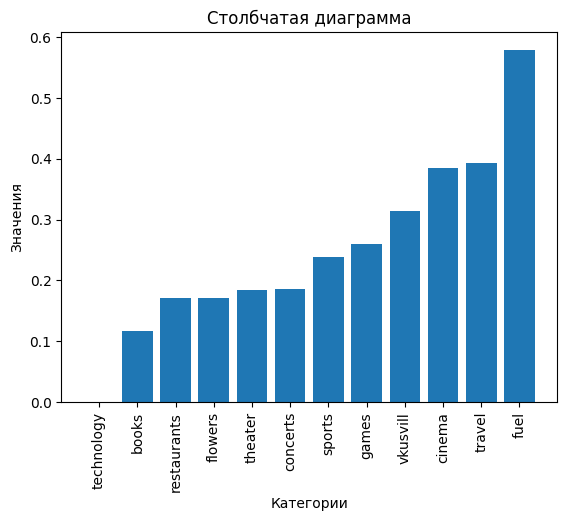

[('fuel', 0.5789473684210527), ('travel', 0.39222829386763813), ('cinema', 0.38557305016477483), ('vkusvill', 0.31446540880503143), ('games', 0.26048565121412803), ('sports', 0.23863636363636365), ('concerts', 0.18508997429305912), ('theater', 0.1836734693877551), ('flowers', 0.1702127659574468), ('restaurants', 0.1702127659574468), ('books', 0.11739130434782609), ('technology', 0.0)]


In [ ]:
# Подсчет коэффициэнта возвращаемости по формуле X/(X+Y), где X - кол-во людей кто купил категорию 2 и более раз, Y - менее соответственно

# m['X'] = [Y, Z]  значит, что в категории X, Y человек, которые покупали более одного раза, и Z человек менее
m = {}
koef = {}
for serv in services:
  m[serv] = [len(dataUnique[dataUnique[serv] >= 2]), len(dataUnique[dataUnique[serv] == 1])]
  koef[serv] = m[serv][0] / (m[serv][0] + m[serv][1])

koef1 = dict(sorted(koef.items(), key=lambda item: item[1]))
koef = list(sorted(koef.items(), key=lambda item: item[1]))[::-1]


labels = list(koef1.keys())
values = list(koef1.values())

values = [float(value) for value in values]
# Создание столбчатой диаграммы
plt.bar(labels, values)

# Настройка осей и заголовка
plt.xlabel('Категории')
plt.ylabel('Значения')
plt.title('Столбчатая диаграмма')

# Отображение диаграммы
plt.xticks(rotation='vertical')

plt.show()
print(koef)

In [ ]:
Users = {}  # по ключу user_id доступны все записи отсортированные по датам
print(type(Users))

for user in dataUnique['user_id']:
    Users[user] = data[data['user_id'] == user].copy()  # Создание копии DataFrame
    Users[user]['order_date'] = pd.to_datetime(Users[user]['order_date'])  # Преобразование столбца 'order_date' в формат даты
    Users[user].sort_values(by='order_date', inplace=True)

<class 'dict'>


In [ ]:
type(Users)

dict

In [ ]:
Users[674]


,user_id,sex,age,region,bundle,num_sessions,avg_session,service,order_date,price,...,vkusvill,travel,restaurants,concerts,games,books,theater,sports,flowers,technology
136,674,F,17,Москва,No bundle,339.0,74.836254,Вкусвилл,2022-10-03,43.89,...,1,0,0,0,0,0,0,0,0,0
137,674,F,17,Москва,No bundle,339.0,74.836254,Вкусвилл,2022-12-20,49.29,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
Users[134]

In [ ]:
import math

RESULTS = {}
for serv1 in range(3):
  popular = koef[serv1][0]
  for serv in services:
    if serv == popular:
      continue
    use = 0
    not_use = len(dataUnique[dataUnique[popular] >= 1])
    for useri in dataUnique['user_id']:
      user = Users[useri]
      min_popular_index = user[user[popular] == 1].index.min()
      max_need_index = user[user[serv] == 1].index.min()
      if math.isnan(min_popular_index) or math.isnan(max_need_index):
        continue
      # print(f'RESULT - {user["user_id"]}: {popular} = {min_popular_index}, {serv} = {max_need_index}')
      if min_popular_index < max_need_index:
        use += 1
      # else:
      #   # print(f'RESULT - {min_popular_index}: {type(min_popular_index)}, {max_need_index}: {type(max_need_index)}')
      #   not_use += 1
  if use + not_use == 0:
    continue
  if popular in RESULTS:
    RESULTS[popular].append({ serv: (use / (use + not_use)) })
    print("AAAAA")
  else:
    RESULTS[popular] = [{ serv: (use / (use + not_use)) }]
    print("RRRR")
RESULTS

RRRR
RRRR


KeyboardInterrupt: ignored

In [ ]:
print(RESULTS)

{}
